In [1]:
from thermogravimetricAnalysis import TGA
tga = TGA()

In [2]:
sample = 'angelim'

In [3]:
tga.read(sample, 5, f'../examples/assets/T5/{sample}.txt')
#tga.read(sample, 10, f'../examples/assets/T10/{sample}.txt')
tga.read(sample, 15, f'../examples/assets/T15/{sample}.txt')
tga.read(sample, 20, f'../examples/assets/T20/{sample}.txt')

'angelim at 20 was loaded!'

In [4]:
tga.massLossAndConversions()
tga.dtg(sample)


In [5]:
for h in [5, 15, 20]:
    id_to_drop = tga.data[sample][h][tga.data[sample][h]['dtg']>0.3] .index.to_list()
    tga.removeData(id_to_drop, sample, h)

    id_to_drop2 = tga.data[sample][h][(tga.data[sample][h]['dtg']<=-0.3) & (tga.data[sample][h]['temperature']<=200)] .index.to_list()
    tga.removeData(id_to_drop2, sample, h)

In [6]:
tga.smoothDataFull()

In [7]:
tga.data[sample][5]

,level_0,index,time,temperature,mass,mass_loss,temperature_k,alpha,dtg,dtg_smoothed
0,5,8,8.0,29.659359,10.330079,99.948885,302.809359,0.000511,-0.190406,-0.080895
1,6,9,9.0,29.695827,10.332101,99.970617,302.845827,0.000294,-0.131830,-0.094930
2,10,14,14.0,29.785488,10.331188,99.960804,302.935488,0.000392,0.190111,-0.106317
3,12,16,16.0,29.823046,10.329723,99.945059,302.973046,0.000549,-0.055065,-0.115056
4,14,18,18.0,29.867874,10.327307,99.919094,303.017874,0.000809,-0.283782,-0.121147
...,...,...,...,...,...,...,...,...,...,...
9121,9171,9176,9176.0,809.625793,1.029130,-0.011919,1082.775793,1.000119,0.010213,-0.062849
9122,9172,9177,9177.0,809.699707,1.031586,0.014477,1082.849707,0.999855,0.061497,-0.073266
9123,9173,9178,9178.0,809.791992,1.030081,-0.001698,1082.941992,1.000017,0.098441,-0.084889
9124,9174,9179,9179.0,809.885742,1.033290,0.032790,1083.035742,0.999672,0.009841,-0.097716


In [8]:
from kinetics import Kinetics

In [9]:
k = Kinetics()
k.loadData(tga.data[sample], tga.sampleHeatingRates[sample])



In [10]:
k.FWO(alpha_min=0.1, alpha_max=0.9, alpha_spacing=0.05)

,alpha,Slope,R,R2,Intercept,Poison,Std_Error,Ea,Temperature_Kelvin,Temperature_Celsius,Time
0,0.10,-52644.538603,-0.833028,0.693935,100.272397,0.373211,34962.375651,416.075141,537.101813,263.951813,990.0
1,0.15,-45904.590923,-0.966744,0.934593,83.610442,0.164643,12143.827835,362.806089,565.899237,292.749237,1105.0
2,0.20,-54612.515467,-0.962864,0.927107,96.162603,0.174039,15313.391065,431.629010,582.954321,309.804321,1173.0
3,0.25,-57523.107095,-0.962736,0.926861,98.725898,0.174340,16158.863563,454.632817,597.667456,324.517456,1232.0
4,0.30,-59712.454795,-0.973217,0.947152,100.366285,0.147672,14104.920753,471.936286,610.234900,337.084900,1282.0
5,0.35,-56771.598430,-0.975410,0.951424,93.986762,0.141472,12827.826188,448.693282,620.699469,347.549469,1324.0
6,0.40,-53267.414353,-0.982765,0.965827,87.142124,0.118366,10019.642486,420.998028,629.722449,356.572449,1360.0
7,0.45,-47858.359013,-0.988999,0.978118,77.689928,0.094519,7158.195954,378.247659,637.220313,364.070313,1390.0
8,0.50,-43203.037319,-0.987811,0.975771,69.744139,0.099498,6807.802391,341.454409,643.230627,370.080627,1414.0
9,0.55,-40936.705951,-0.990470,0.981031,65.718880,0.087959,5692.317484,323.542501,648.500830,375.350830,1435.0


In [11]:
k.heating_rates

[5, 15, 20]

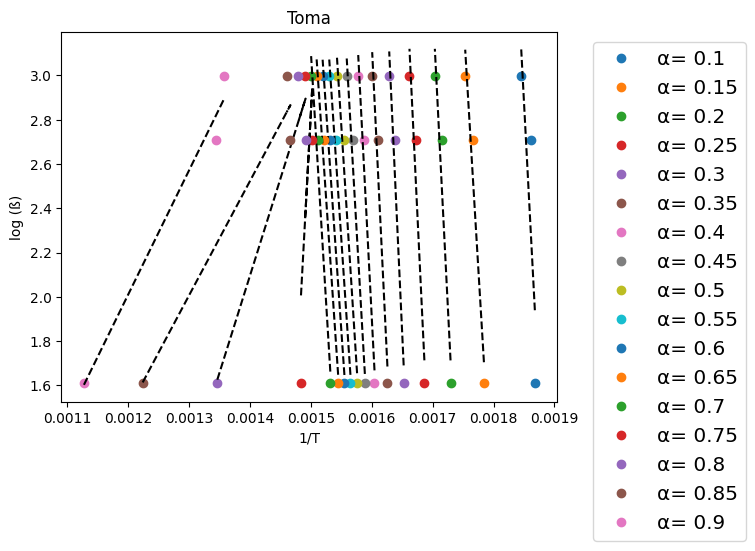

In [15]:
k.plotFWO(plt_title='Toma')